<a href="https://colab.research.google.com/github/suyash-dabral/CarbonMarketsHQ_Assignments/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating synthetic dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set a random seed for reproducibility
np.random.seed(42)

# Define the parameters
num_samples = 1000

# Generate synthetic data
data = {
    'project_id': np.arange(1, num_samples + 1),
    'project_type': np.random.choice(['REDD+', 'Renewable Energy', 'Energy Efficiency'], num_samples),
    'location': np.random.choice(['USA', 'Brazil', 'India', 'China', 'Australia'], num_samples),
    'project_listing_date': pd.date_range(start='1/1/2015', periods=num_samples, freq='M'),
    'total_credits_registered': np.random.randint(1000, 100000, num_samples)
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

# Define the file path
file_path = '/content/drive/MyDrive/CarbonMarkets_files/synthetic_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"Synthetic dataset saved to: {file_path}")



Synthetic dataset saved to: /content/drive/MyDrive/CarbonMarkets_files/synthetic_dataset.csv


#Creating custom price calculator

In [10]:
# Define the weights for each factor
weights = {
    'project_type': {'REDD+': 1.5, 'Renewable Energy': 1.2, 'Energy Efficiency': 1.0},
    'location': {'USA': 1.4, 'Brazil': 1.3, 'India': 1.2, 'China': 1.1, 'Australia': 1.0},
    'age_factor': 0.95,  # Assuming older projects are slightly cheaper
    'credits_registered_factor': 0.0001  # Assuming more credits registered reduce price
}

# Function to calculate price
def calculate_price(row):
    project_age = (pd.Timestamp.now() - row['project_listing_date']).days / 365
    price = (weights['project_type'][row['project_type']] *
             weights['location'][row['location']] *
             (weights['age_factor'] ** project_age) *
             (1 / (1 + weights['credits_registered_factor'] * row['total_credits_registered'])))
    return price

# Apply the pricing model
df['price'] = df.apply(calculate_price, axis=1)

# Display the first few rows of the dataset with prices
df.head()


,project_id,project_type,location,project_listing_date,total_credits_registered,price
0,1,Energy Efficiency,India,2015-01-31,70569,0.091409
1,2,REDD+,India,2015-02-28,18087,0.394869
2,3,Energy Efficiency,Australia,2015-03-31,6704,0.370474
3,4,Energy Efficiency,China,2015-04-30,61576,0.095507
4,5,REDD+,Brazil,2015-05-31,74384,0.144237



### Explanation of Chosen Factors and Their Weights
- **Project Type**: REDD+ (1.5), Renewable Energy (1.2), Energy Efficiency (1.0)
- **Location**: USA (1.4), Brazil (1.3), India (1.2), China (1.1), Australia (1.0)
- **Project Age**: Older projects are slightly cheaper (factor: 0.95 per year)
- **Total Credits Registered**: More credits registered reduce price slightly (factor: 0.0001 per credit)



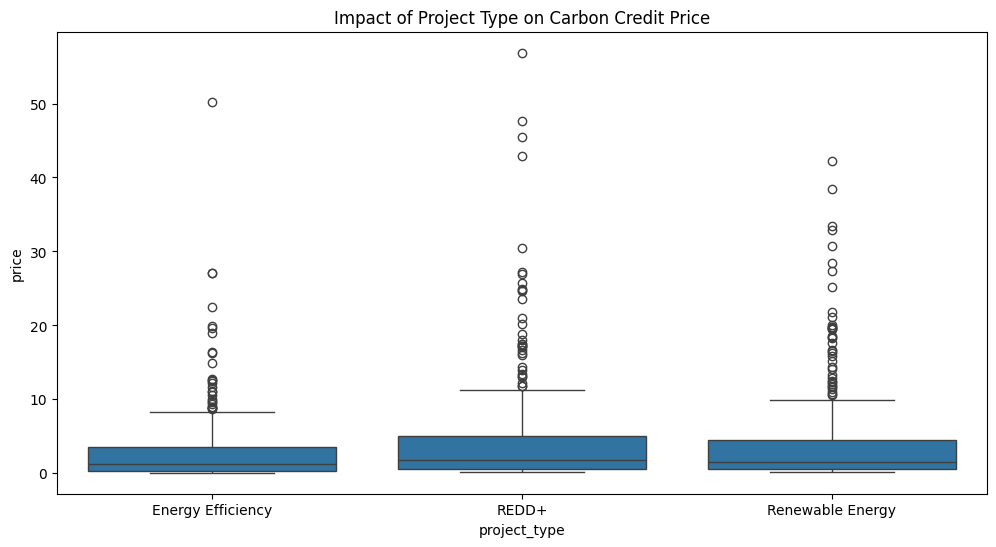

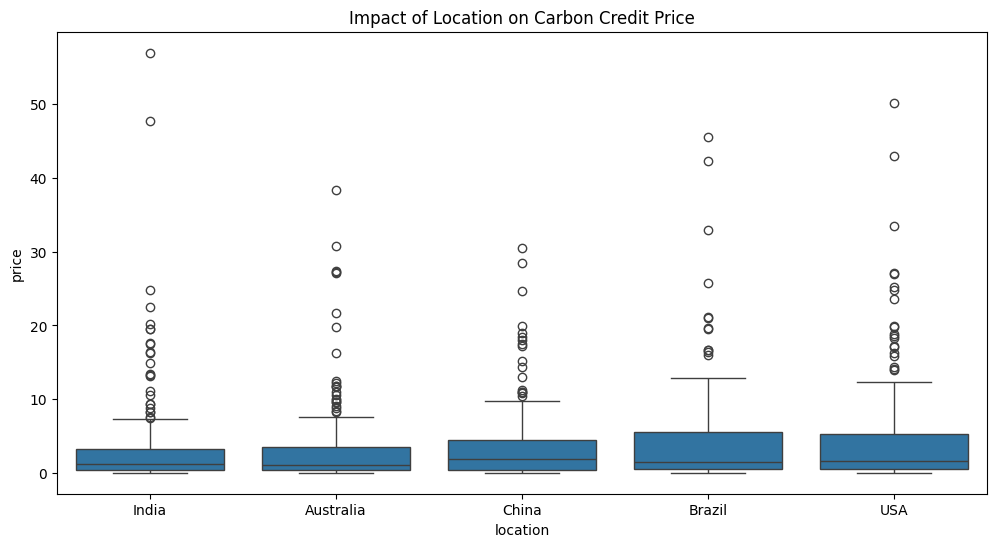

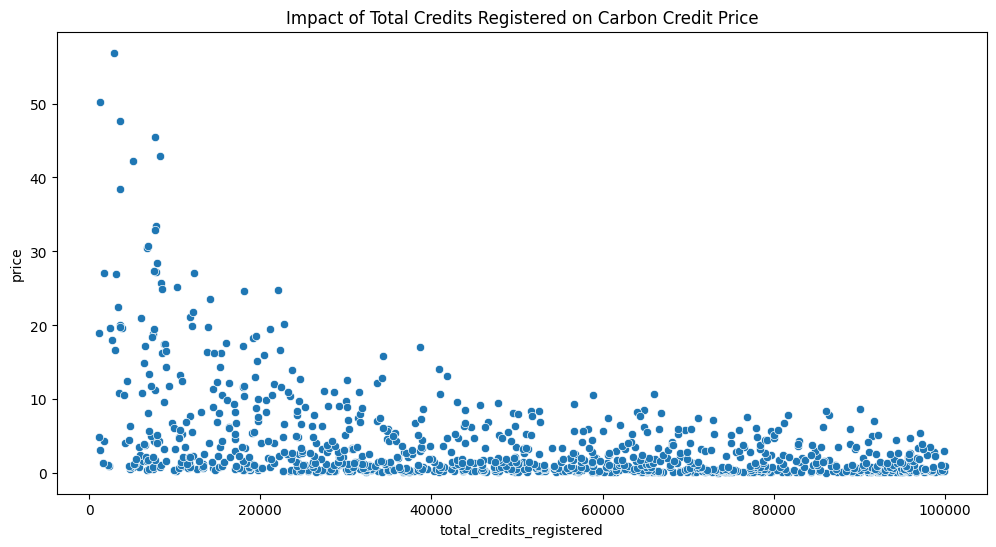

Estimated Price: 0.22


In [11]:
# Explanation of chosen factors and their weights

explanation = """
### Explanation of Chosen Factors and Their Weights
- **Project Type**: REDD+ (1.5), Renewable Energy (1.2), Energy Efficiency (1.0)
- **Location**: USA (1.4), Brazil (1.3), India (1.2), China (1.1), Australia (1.0)
- **Project Age**: Older projects are slightly cheaper (factor: 0.95 per year)
- **Total Credits Registered**: More credits registered reduce price slightly (factor: 0.0001 per credit)
"""

print(explanation)

# Visualization of how different factors impact the price
plt.figure(figsize=(12, 6))
sns.boxplot(x='project_type', y='price', data=df)
plt.title('Impact of Project Type on Carbon Credit Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='price', data=df)
plt.title('Impact of Location on Carbon Credit Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_credits_registered', y='price', data=df)
plt.title('Impact of Total Credits Registered on Carbon Credit Price')
plt.show()

# Function to estimate price based on user input
def estimate_price(project_type, location, project_listing_date, total_credits_registered):
    project_age = (pd.Timestamp.now() - pd.to_datetime(project_listing_date)).days / 365
    price = (weights['project_type'][project_type] *
             weights['location'][location] *
             (weights['age_factor'] ** project_age) *
             (1 / (1 + weights['credits_registered_factor'] * total_credits_registered)))
    return price

# Example
example_project = {
    'project_type': 'REDD+',
    'location': 'Brazil',
    'project_listing_date': '2017-06-01',
    'total_credits_registered': 50000
}

price_estimate = estimate_price(**example_project)
print(f"Estimated Price: {price_estimate:.2f}")


#Command line implementation of Custom pricing model (User Input)

In [14]:
# Function to estimate price based on user input
def estimate_price_interactive(project_type, location, project_listing_date, total_credits_registered):
    project_age = (pd.Timestamp.now() - pd.to_datetime(project_listing_date)).days / 365
    price = (weights['project_type'][project_type] *
             weights['location'][location] *
             (weights['age_factor'] ** project_age) *
             (1 / (1 + weights['credits_registered_factor'] * total_credits_registered)))
    return price

# Example usage with interactive input
project_type = input("Enter project type (REDD+, Renewable Energy, Energy Efficiency): ")
location = input("Enter location (USA, Brazil, India, China, Australia): ")
project_listing_date = input("Enter project listing date (YYYY-MM-DD): ")
total_credits_registered = int(input("Enter total credits registered: "))

price_estimate = estimate_price_interactive(project_type, location, project_listing_date, total_credits_registered)
print(f"Estimated Price: {price_estimate:.2f}")


Enter project type (REDD+, Renewable Energy, Energy Efficiency): REDD+
Enter location (USA, Brazil, India, China, Australia): India
Enter project listing date (YYYY-MM-DD): 2021-11-11
Enter total credits registered: 10000
Estimated Price: 0.78
